0 <= width < 10: 34735
10 <= width < 20: 57370
20 <= width < 30: 25016
30 <= width < 40: 13424
40 <= width < 50: 8058
50 <= width: 20793
0 <= width/height < 0.6: 7860
0.6 <= width/height < 0.7: 23046
0.7 <= width/height < 0.8: 47077
0.8 <= width/height < 0.9: 45514
0.9 <= width/height < 1.0: 16824
1.0 <= width/height: 19075


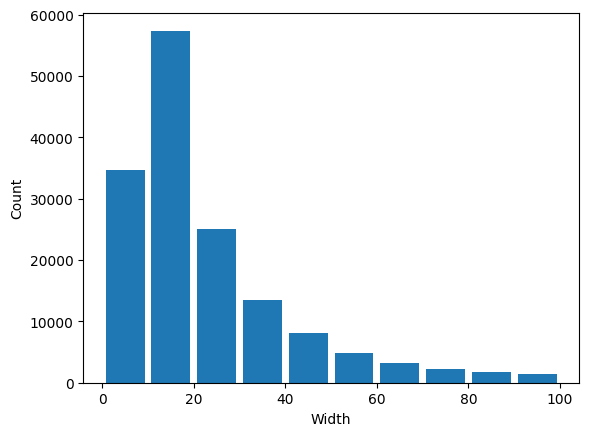

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if __name__ == '__main__':
  anno_file = 'annotation.txt'
  with open(anno_file, 'r') as fp:
    lines = fp.readlines()
  # Enter your code here (25%)
  # You might use the following to access each line
  # for line in lines:
  #Step 2b.1: Open assignment_2b.ipynb
  #2b.2
  width_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, float('inf'))]# 用width_ranges 來表示每個寬度範圍的下界和上界
  width_counts = [0] * len(width_ranges)# 創造一個list用來存屬於rannge的值
  
  for line in lines:
    annotation = line.strip().split(' ')# Use annotation = line.strip().split(' ') to convert each line to a list
    #print(line)
    bboxes = np.array([int(x) for x in annotation[1:]]).reshape(-1, 4)#Convert the type of each element of annotation[1:] to integer 併四個四個一組
    #print(bboxes)
    for x1, y1, x2, y2 in bboxes:
        width = x2 - x1 + 1 #The width of a bounding box is defined as x2-x1+1
        height = y2 - y1 + 1 #The height of a bounding box is defined as y2-y1+1
        
        if width >= 0 and height >= 0 and x2 > x1 and y2 > y1:  # 檢查當前定界框是否有效
            for i, (low, up) in enumerate(width_ranges):
                if low <= width < up:
                    width_counts[i] += 1 #看width屬於哪一個range
                    break

  for i, (low, up) in enumerate(width_ranges):
    if up == float('inf'):
        print(f"{low} <= width: {width_counts[i]}")
    else:
        print(f"{low} <= width < {up}: {width_counts[i]}")
  #Display the required information in Step 2 based on the above list
  
  #2b.3
  ratio_ranges = [(0, 0.6), (0.6, 0.7), (0.7, 0.8), (0.8, 0.9), (0.9, 1.0), (1.0, float('inf'))]
  ratio_counts = [0] * len(ratio_ranges)

  for line in lines:
    annotation = line.strip().split(' ')
    bboxes = np.array([int(x) for x in annotation[1:]]).reshape(-1, 4)
    
    for x1, y1, x2, y2 in bboxes:
        width = x2 - x1 + 1
        height = y2 - y1 + 1
        
        if width >= 0 and height >= 0 and x2 > x1 and y2 > y1:  
            ratio = width / height
            for i, (low, up) in enumerate(ratio_ranges):
                if low <= ratio < up:
                    ratio_counts[i] += 1
                    break

  for i, (low, up) in enumerate(ratio_ranges):
    if up == float('inf'):
        print(f"{low} <= width/height: {ratio_counts[i]}")
    else:
        print(f"{low} <= width/height < {up}: {ratio_counts[i]}")
        
        #基本上跟2b.2一樣  只是將width改為width/height
  #2b.4  
  widths = []
  for line in lines:
    annotation = line.strip().split(' ')
    bboxes = np.array([int(x) for x in annotation[1:]]).reshape(-1, 4)
    
    for x1, y1, x2, y2 in bboxes:
        width = x2 - x1 + 1
        height = y2 - y1 + 1
        #上面都跟2b.2 2b.3一樣
        if width >= 0 and height >= 0 and x2 > x1 and y2 > y1:  
            widths.append(width) #如果有效  將width加到list中

 
  plt.hist(widths, bins=range(0, 101, 10), rwidth=0.85)#跟講義一樣
  plt.xlabel('Width')
  plt.ylabel('Count')
  plt.show()


In [4]:
# Step 2b.5: In Step 2b.1, we only consider valid bounding boxes. How many bounding boxes are invalid? Modify the above code to find the answer. (5%)
# Write down your answer here.

invalid = 0

for line in lines:
    annotation = line.strip().split(' ')
    bboxes = np.array([int(x) for x in annotation[1:]]).reshape(-1, 4)
    
    for x1, y1, x2, y2 in bboxes:
        if not (x1 >= 0 and y1 >= 0 and x2 > x1 and y2 > y1):
            invalid += 1

print(invalid)
#535個

535
